In [1]:
import numpy as np
import jax
import matplotlib.pyplot as plt


from pathlib import Path
import sys
sys.path.append(str(Path.cwd().joinpath("model")))

from processes.all_processes import Matrix_1_epem_mupmum
from model.parameters import ModelParameters
from phase_space_generator.flat_phase_space_generator import FlatInvertiblePhasespace, LorentzVectorList, LorentzVector

In [2]:
active_model = ModelParameters(None)
def matrix_element(x):
    e = 90.0
    theta = x

        
    process = Matrix_1_epem_mupmum()

    
    vectors = [
        [e/2,0,0, e/2],
        [e/2,0,0,-e/2],
        [e/2, 0, e/2*jax.numpy.sin(theta), e/2*jax.numpy.cos(theta)],
        [e/2, 0,-e/2*jax.numpy.sin(theta),-e/2*jax.numpy.cos(theta)],
    ]

    PS_point = LorentzVectorList(LorentzVector(v) for v in vectors)
    return process.smatrix(PS_point, active_model)[0]


matrix_element_prime = jax.grad(matrix_element)

In [3]:
angles = np.linspace(0,np.pi)

In [4]:
mevals = np.asarray([matrix_element(a) for a in angles])

In [5]:
meprime = np.asarray([matrix_element_prime(a) for a in angles])

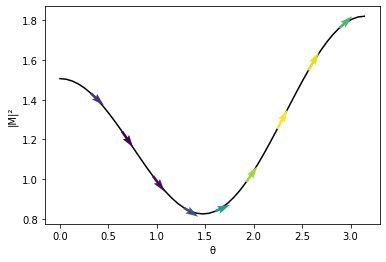

In [7]:
every_n = 5
plt.plot(angles,mevals,c = 'k')
plt.quiver(
    angles[::every_n],mevals[::every_n],np.ones_like(angles)[::every_n],meprime[::every_n],meprime[::every_n],
    units = 'xy', angles = 'xy', zorder = 99
)
plt.xlabel(u'θ')
plt.ylabel(u'|M|²');